In [1]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

import anndata
from scipy.stats import spearmanr, pearsonr
import numpy as np
from PIL import Image
import matplotlib

from digitalhistopathology.clustering.clustering_utils import plot_ari_scores_all_patients
import warnings

# Suppress all UserWarning messages
warnings.filterwarnings("ignore", category=UserWarning)

Image.MAX_IMAGE_PIXELS = None
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

2025-10-07 10:12:31.315442: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2025-10-07 10:12:31.315568: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2025-10-07 10:12:31.315577: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


[KeOps] Warning : Cuda libraries were not detected on the system or could not be loaded ; using cpu only mode


In [4]:
# Load configuration
with open("../config/config_notebooks.json", "r") as config_file:
    config = json.load(config_file)

In [5]:
from digitalhistopathology.benchmark.benchmark_clustering import BenchmarkClustering

# Initialize the BenchmarkClustering object

saving_folder=os.path.join(config['base_benchmark_folder'], "unsupervised_clustering_ARI", "kmeans")
extension='pdf'


benchmark_clustering = BenchmarkClustering(path_to_pipeline=config['path_to_base_pipelines'],
                                           pipelines_list=config['base_model_list'],
                                           results_folder="../results",
                                           saving_folder=saving_folder,
                                           dataset=config['dataset'],
                                           extension=extension
                                           )

['uni', 'uni2', 'virchow', 'provgigapath', 'ctranspath', 'simclr']
<class 'list'>
Label files: ['../data/HER2_breast_cancer/meta/A1_labeled_coordinates.tsv', '../data/HER2_breast_cancer/meta/B1_labeled_coordinates.tsv', '../data/HER2_breast_cancer/meta/C1_labeled_coordinates.tsv', '../data/HER2_breast_cancer/meta/D1_labeled_coordinates.tsv', '../data/HER2_breast_cancer/meta/E1_labeled_coordinates.tsv', '../data/HER2_breast_cancer/meta/F1_labeled_coordinates.tsv', '../data/HER2_breast_cancer/meta/G2_labeled_coordinates.tsv', '../data/HER2_breast_cancer/meta/H1_labeled_coordinates.tsv']


In [6]:


a = config["base_color_palette"]
sns.set_palette(a)
base_model_palette = config["base_model_palette"]

base_model_list = config["base_model_list"]
benchmark_folder = config["base_benchmark_folder"]

## Create Figure2 folder
if not os.path.exists(os.path.join(config['figures_folder'], "Figure2")):
    os.makedirs(os.path.join(config['figures_folder'], "Figure2"))

## Create Figure3 folder
if not os.path.exists(os.path.join(config['figures_folder'], "Figure3")):
    os.makedirs(os.path.join(config['figures_folder'], "Figure3"))

## Create Figure4 folder
if not os.path.exists(os.path.join(config['figures_folder'], "Figure4")):
    os.makedirs(os.path.join(config['figures_folder'], "Figure4"))
    
## Create Figure5 folder
if not os.path.exists(os.path.join(config['figures_folder'], "Figure5")):
    os.makedirs(os.path.join(config['figures_folder'], "Figure5"))

## Comparison between linear and unlinear clustering

In [59]:
try:
    with open(os.path.join(benchmark_folder, 'unsupervised_clustering_ARI', 'kmeans', 'unsupervised_clustering_results_optk.json')) as f:
        raw_clust = json.load(f)
except:
    raw_clust = benchmark_clustering.unsupervised_clustering_benchmark(n_clusters=None, clustering_name='raw')

try:
    with open(os.path.join(benchmark_folder, 'unsupervised_clustering_ARI', 'kmeans',  'svd5_multiplied_by_S_unsupervised_clustering_results_optk.json')) as f:
        svd_clust = json.load(f)
except:
    svd_clust = benchmark_clustering.unsupervised_clustering_benchmark(n_clusters=None, clustering_name='svd5')
    

# try:
#     with open(os.path.join(benchmark_folder, 'unsupervised_clustering_ARI', 'kmeans', 'best_umap_ari_per_slide.json')) as f:
#         umap_clust = json.load(f)
# except:
umap_clust = benchmark_clustering.get_best_UMAP_ari_per_slide(force_loading=True)

## Add handcrafted features
import glob
umap_clust["handcrafted_features"] = {}
for file in glob.glob(os.path.join(benchmark_clustering.saving_folder, f'best_umap_ari_model_handcrafted_features_patient_*.json')):
    patient_name = os.path.basename(file).split("_patient_")[1].split('.json')[0]
    with open(file, 'r') as f:
        umap_clust["handcrafted_features"][patient_name] = json.load(f)


Embeddings per patient: None
Model: uni
Force loading best UMAP parameters for model uni for existing patients...
Model: uni
Force loading best UMAP parameters for model uni for existing patients...
Model: uni2
Force loading best UMAP parameters for model uni2 for existing patients...
Model: virchow
Force loading best UMAP parameters for model virchow for existing patients...
Model: provgigapath
Force loading best UMAP parameters for model provgigapath for existing patients...
Model: ctranspath
Force loading best UMAP parameters for model ctranspath for existing patients...
Model: simclr
Force loading best UMAP parameters for model simclr for existing patients...


In [60]:
umap_clust["handcrafted_features"]

{'E1': {'ari': 0.05499890621890623,
  'params': {'n_neighbors': 10, 'min_dist': 0.001, 'n_components': 2}},
 'C1': {'ari': 0.053029060128816516,
  'params': {'n_neighbors': 30, 'min_dist': 0.1, 'n_components': 2}},
 'F1': {'ari': 0.033991882796027294,
  'params': {'n_neighbors': 10, 'min_dist': 0.001, 'n_components': 2}},
 'D1': {'ari': 0.2559409534874934,
  'params': {'n_neighbors': 10, 'min_dist': 0.1, 'n_components': 2}},
 'B1': {'ari': 0.2587166844973507,
  'params': {'n_neighbors': 50, 'min_dist': 0.001, 'n_components': 2}},
 'G2': {'ari': 0.09063232895986285,
  'params': {'n_neighbors': 400, 'min_dist': 0.001, 'n_components': 2}},
 'H1': {'ari': 0.2428607734315995,
  'params': {'n_neighbors': 400, 'min_dist': 0.001, 'n_components': 2}}}

In [61]:
for model in raw_clust.keys():
    print(f"Model: {model}: ari all: {raw_clust[model]['all']['ari']}, ari mean: {raw_clust[model]['mean']['ari']}")

Model: uni: ari all: 0.1405392782347744, ari mean: 0.2351268295263375
Model: uni2: ari all: 0.18521218744767412, ari mean: 0.2679689887382149
Model: virchow: ari all: 0.1183085728713925, ari mean: 0.17190180596666965
Model: provgigapath: ari all: 0.17792105308917527, ari mean: 0.21482550933591596
Model: ctranspath: ari all: 0.13713016500660263, ari mean: 0.19542486389103267
Model: simclr: ari all: 0.12163234853750751, ari mean: 0.1942217274165287
Model: handcrafted_features: ari all: 0.10094446204343024, ari mean: 0.11174721697791898


In [62]:
for model in raw_clust.keys():
    print(f"Model: {model}: ari tumor: {raw_clust[model]['ARI_tumor']}")

Model: uni: ari tumor: 0.14775572194802
Model: uni2: ari tumor: 0.1864012080313909
Model: virchow: ari tumor: 0.10255900228781585
Model: provgigapath: ari tumor: 0.15293057564211432
Model: ctranspath: ari tumor: 0.13812792738857277
Model: simclr: ari tumor: 0.1309163343846592
Model: handcrafted_features: ari tumor: 0.08584559722543653


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


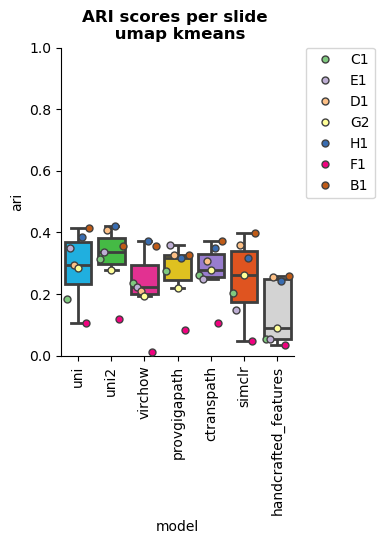

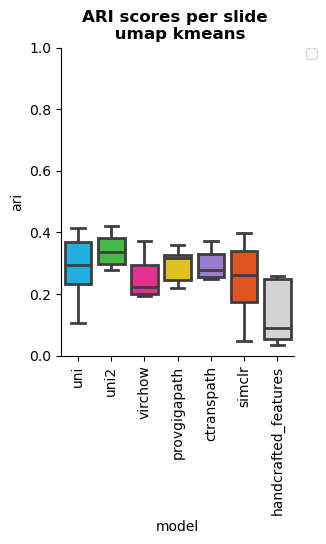

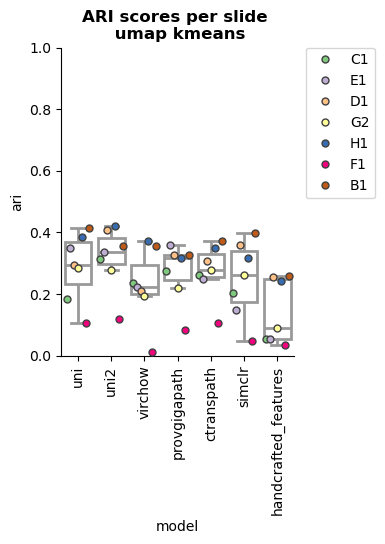

In [63]:
# for clust_dict, clust_name in zip([raw_clust, svd_clust, umap_clust], ["raw", "svd", "umap"]):

plt.figure(figsize=(3,4))
plot_ari_scores_all_patients(umap_clust, model_list=umap_clust.keys(), color_boxes=True, palette=base_model_palette)
plt.ylim(0, 1)
plt.title(f"ARI scores per slide \n umap kmeans", weight='bold')
# plt.savefig(os.path.join(config["figures_folder"],"Figure2/ARI_scores_boxplot_umap_kmeans_colored_with_patient.pdf"), bbox_inches='tight')
if len(umap_clust[base_model_list[0]]) > 15:
    plt.legend().remove()
    
plt.figure(figsize=(3,4))
plot_ari_scores_all_patients(umap_clust, model_list=umap_clust.keys(), stripplot=False, color_boxes=True, palette=base_model_palette)
plt.ylim(0, 1)
plt.title(f"ARI scores per slide \n umap kmeans", weight='bold')
# plt.savefig(os.path.join(config["figures_folder"],"Figure2/ARI_scores_boxplot_umap_kmeans_colored_without_patient.pdf"), bbox_inches='tight')
if len(umap_clust[base_model_list[0]]) > 15:
    plt.legend().remove()
    
plt.figure(figsize=(3,4))
plot_ari_scores_all_patients(umap_clust, model_list=umap_clust.keys(), stripplot=True, color_boxes=False)
plt.ylim(0, 1)
plt.title(f"ARI scores per slide \n umap kmeans", weight='bold')
# plt.savefig(os.path.join(config["figures_folder"],"Figure2/ARI_scores_boxplot_umap_kmeans_no_color_with_patient.pdf"), bbox_inches='tight')
if len(umap_clust[base_model_list[0]]) > 15:
    plt.legend().remove()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'ARI scores per slide \n UMAP k-means')

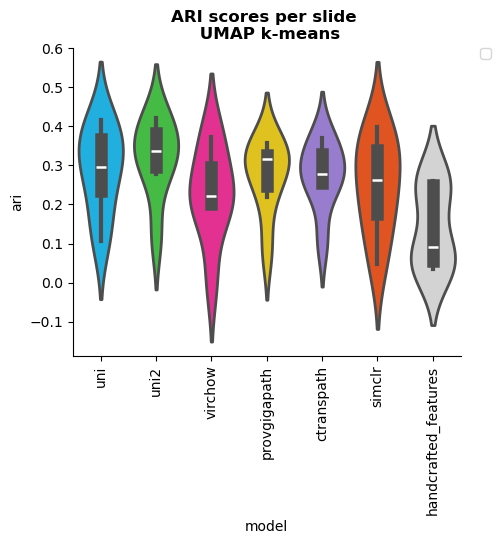

In [64]:


ari_scores = {}
for model in umap_clust.keys():
    ari_scores[model] = {}
    for patient in umap_clust[model].keys():
        if (patient != 'all') and (patient != 'mean'):
            ari_scores[model][patient] = umap_clust[model][patient]['ari']
df_aris = pd.DataFrame.from_dict(ari_scores)
df_aris_melted = pd.melt(df_aris, var_name='model', value_name='ari')
df_aris_melted['patient'] = df_aris.index.to_list()*len(df_aris.columns)

plt.figure(figsize=(5,4))
sns.violinplot(data=df_aris_melted, x='model', y='ari', hue='model', linewidth=2)


plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine()
plt.title(f'ARI scores per slide \n UMAP k-means', weight='bold')

Text(0.5, 1.0, 'Distribution of ARI scores for unsupervised clustering \n n_patient=7')

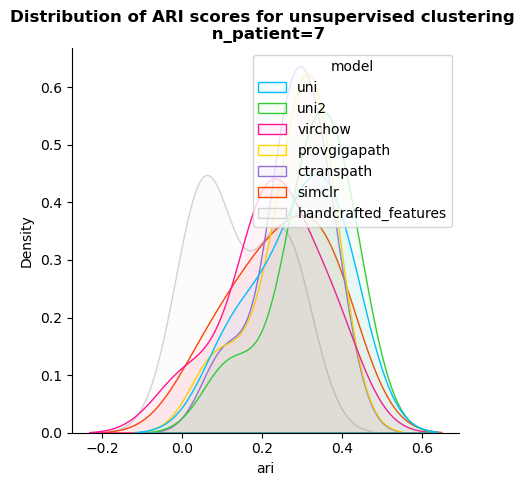

In [65]:
sns.kdeplot(data=df_aris_melted, x='ari', hue='model', fill=True, alpha=0.05)
sns.despine()
plt.title(f'Distribution of ARI scores for unsupervised clustering \n n_patient={len(list(umap_clust[list(umap_clust.keys())[0]].keys()))}', weight='bold')

In [66]:
# Scatter plot

In [67]:
dfs_clust = []
for clustering_dict, method in zip([raw_clust, svd_clust, umap_clust], ["raw", "svd", "umap"]):
#for clustering_dict, method in zip([umap_clust], ["umap"]):
    ari_scores = {}
    for model in clustering_dict.keys():
        ari_scores[model] = {}
        for patient in clustering_dict[model].keys():
            if patient != "ARI_tumor":
            #if (patient != 'all') and (patient != 'mean'):
                ari_scores[model][patient] = clustering_dict[model][patient]['ari']
    df_aris = pd.DataFrame.from_dict(ari_scores)
    df_aris_melted = pd.melt(df_aris, var_name='model', value_name='ari')
    df_aris_melted['patient'] = df_aris.index.to_list()*len(df_aris.columns)
    df_aris_melted['clustering'] = method
    dfs_clust.append(df_aris_melted)

df_comp = pd.concat(dfs_clust)




In [68]:
df_comp

,model,ari,patient,clustering
0,uni,0.303135,B1,raw
1,uni,0.161330,C1,raw
2,uni,0.309677,D1,raw
3,uni,0.204250,E1,raw
4,uni,0.064554,F1,raw
...,...,...,...,...
44,handcrafted_features,0.255941,D1,umap
45,handcrafted_features,0.090632,G2,umap
46,handcrafted_features,0.242861,H1,umap
47,handcrafted_features,0.033992,F1,umap


In [69]:
df_comp[df_comp['clustering'] == 'raw'][['model', 'ari']].groupby('model').mean()

,ari
model,
ctranspath,0.188948
handcrafted_features,0.110547
provgigapath,0.210725
simclr,0.186156
uni,0.224617
uni2,0.258774
virchow,0.165947


In [70]:
df_comp[df_comp['clustering'] == 'raw'][['model', 'ari']].groupby('model').std()

,ari
model,
ctranspath,0.091898
handcrafted_features,0.087322
provgigapath,0.093010
simclr,0.108977
uni,0.094085
uni2,0.105284
virchow,0.104048


In [71]:
## Correlation with shannon entropy
import json 
with open(os.path.join(benchmark_folder, "shannon_entropy", "shannon_entropy_all_comps_raw.json")) as f:
    shannon_entropy = json.load(f)
    


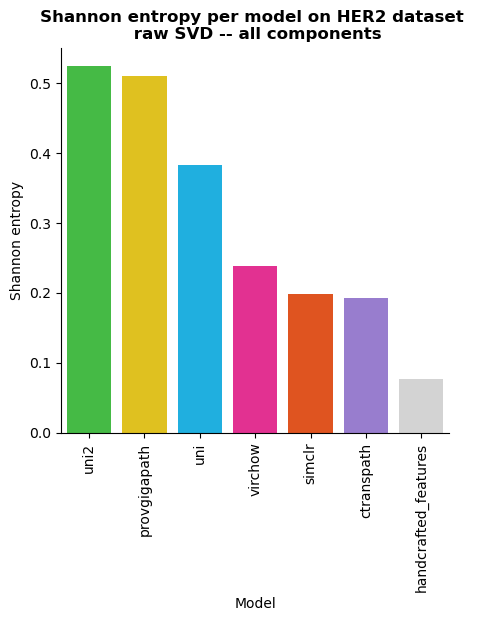

In [72]:

df_shannon = pd.DataFrame.from_dict(shannon_entropy, orient='index', columns=['shannon_entropy'])
df_shannon.rename(index={'handcrafted': 'handcrafted_features'}, inplace=True)

df_shannon.sort_values('shannon_entropy', inplace=True, ascending=False)
sns.barplot(data=df_shannon, 
            x=df_shannon.index, 
            y='shannon_entropy', 
            hue=df_shannon.index, palette=base_model_palette)
sns.despine()
plt.xlabel("Model")
plt.ylabel("Shannon entropy")
plt.title(f"Shannon entropy per model on {config['dataset']} dataset \n raw SVD -- all components", weight='bold')
plt.xticks(rotation=90)
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy.pdf"), bbox_inches='tight')

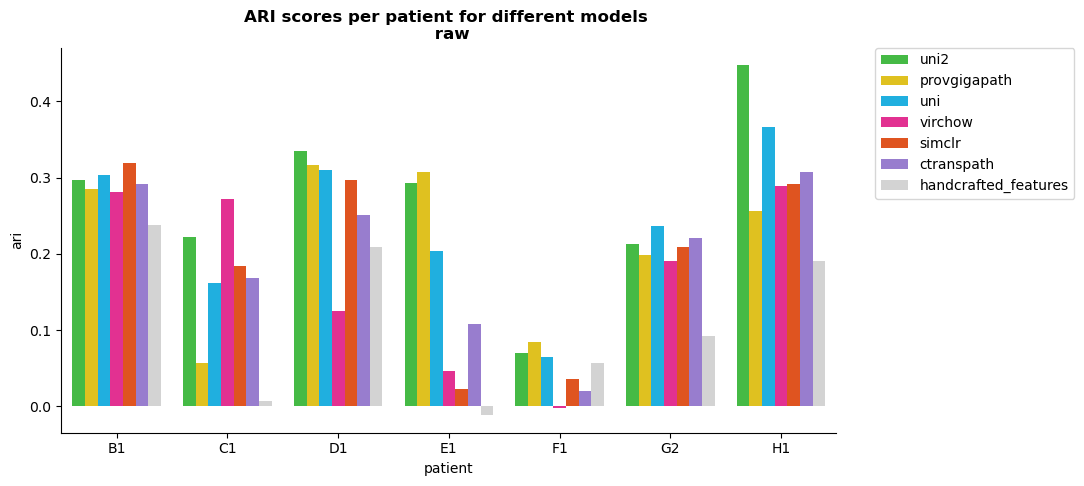

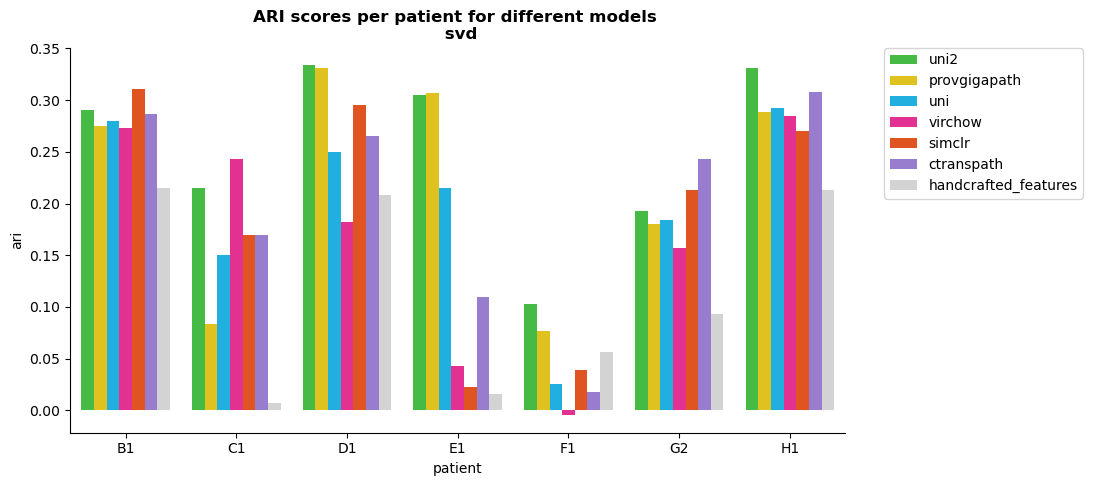

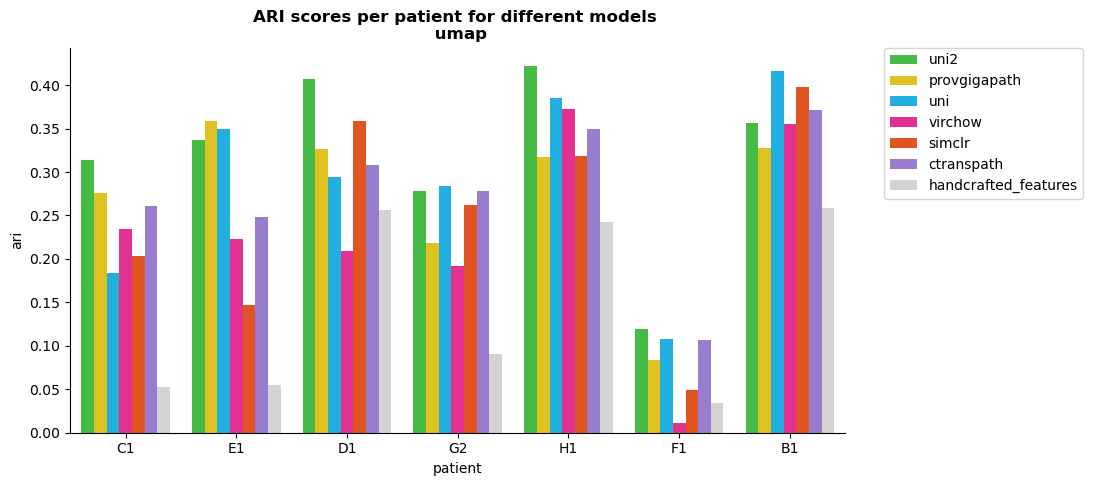

In [73]:
## ARI scores in the same order

for method in ["raw", "svd", "umap"]:
    ordered_dfs = []

    for model in df_shannon.index:
        ordered_dfs.append(df_comp[(df_comp['model'] == model) & (df_comp["clustering"] == method) & (df_comp['patient'] != 'all') & (df_comp['patient'] != 'mean')])

    df_comp_method = pd.concat(ordered_dfs)

    plt.figure(figsize=(10, 5))
    sns.barplot(data=df_comp_method, x='patient', y='ari', hue='model', palette=base_model_palette)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    sns.despine()
    plt.title(f'ARI scores per patient for different models \n {method}', weight='bold')

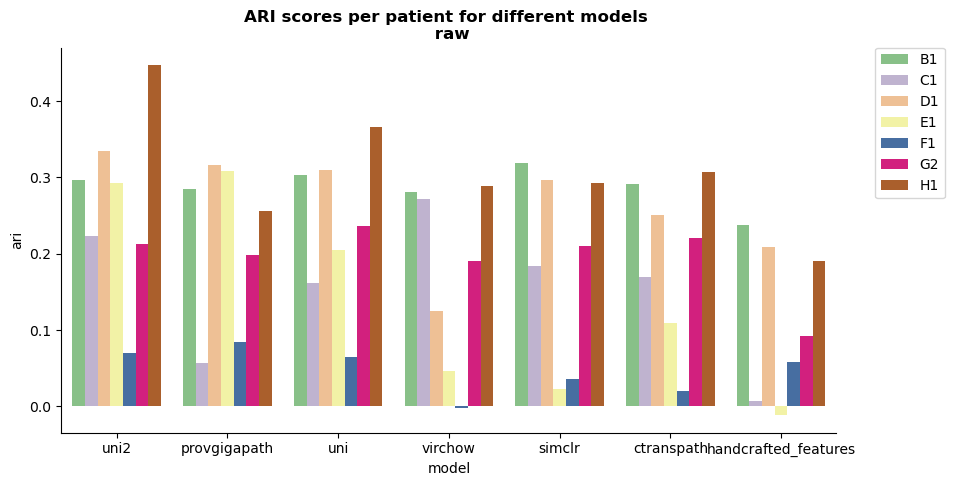

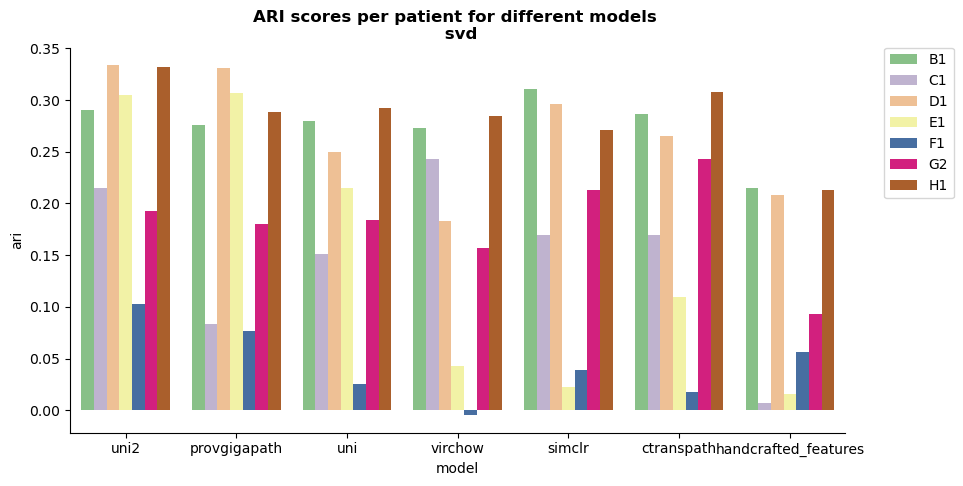

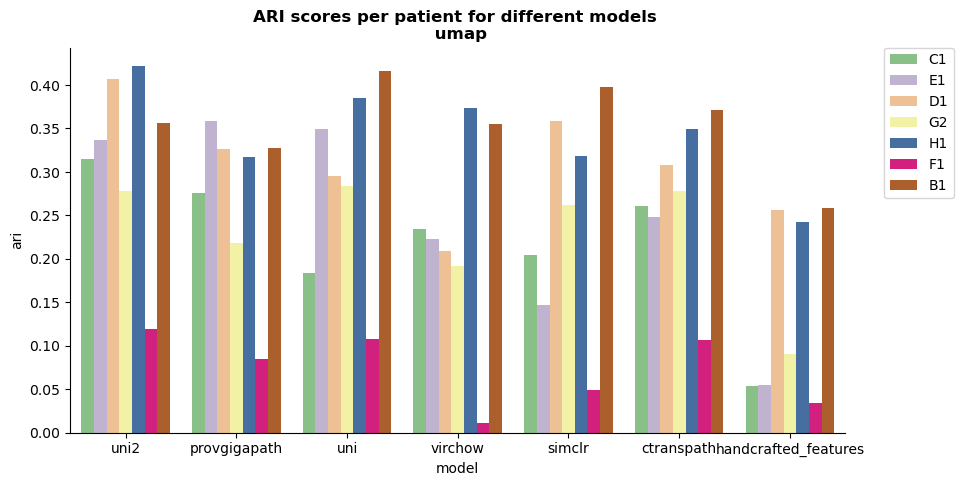

In [74]:
## ARI scores in the same order

for method in ["raw", "svd", "umap"]:
    ordered_dfs = []

    for model in df_shannon.index:
        ordered_dfs.append(df_comp[(df_comp['model'] == model) & (df_comp["clustering"] == method) & (df_comp['patient'] != 'all') & (df_comp['patient'] != 'mean')])

    df_comp_method = pd.concat(ordered_dfs)

    plt.figure(figsize=(10, 5))
    sns.barplot(data=df_comp_method, x='model', y='ari', hue='patient', palette="Accent")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    sns.despine()
    plt.title(f'ARI scores per patient for different models \n {method}', weight='bold')

In [75]:
import math
def make_spider(df, row, color, title):
    
    categories=list(df)[0:]
    N = len(categories)

    
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]
     
    plt.rc('figure', figsize=(5, 5))
 
    ax = plt.subplot(1,1,1, polar=True)
 
    ax.set_theta_offset(math.pi / 2)
    ax.set_theta_direction(-1)
    
 
   
    plt.xticks(angles[:-1], categories, color='black', size=12)
    ax.tick_params(axis='x', rotation=5.5)
    
    ax.set_rlabel_position(0)
    plt.yticks([0.1,0.2,0.3,0.4], ["0.1","0.2","0.3","0.4"], color="black", size=10)
    plt.ylim(0,0.55)
 
    
    values=df.reset_index().loc[row].values.tolist()[1:]
    values += values[:1]
    ax.plot(angles, values, color = color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color = color, alpha = 0.1)
 
  
    plt.title(title, fontsize=20, x = 0.5, y = 1.1)
    

In [76]:
df_comp_patient = df_comp[df_comp["patient"].isin(["A1", "B1", "C1", "D1", "E1", "F1", "G2", "H1"])]


In [77]:
base_model_list

['uni', 'uni2', 'virchow', 'provgigapath', 'ctranspath', 'simclr']

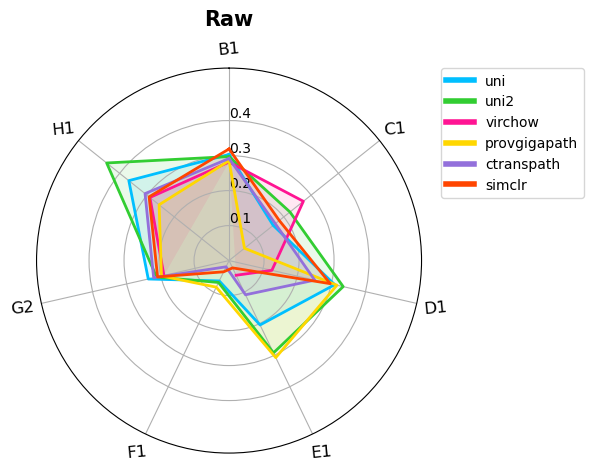

In [78]:
for model in base_model_list:
    d_test = df_comp_patient[(df_comp_patient["model"] == model) & (df_comp_patient["clustering"] == "raw")].T
    d_test.columns = d_test.loc['patient'].values
    make_spider(d_test, row=1, color=base_model_palette[model], title=model)
    plt.title("Raw", weight='bold', y=1.09, fontsize=15)

handles = [plt.Line2D([0], [0], color=base_model_palette[model], lw=4) for model in base_model_list]
plt.legend(handles, base_model_list, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig(os.path.join(config['figures_folder'], "Figure2/unsupervised_clustering_radarplot_raw.pdf"), bbox_inches='tight')

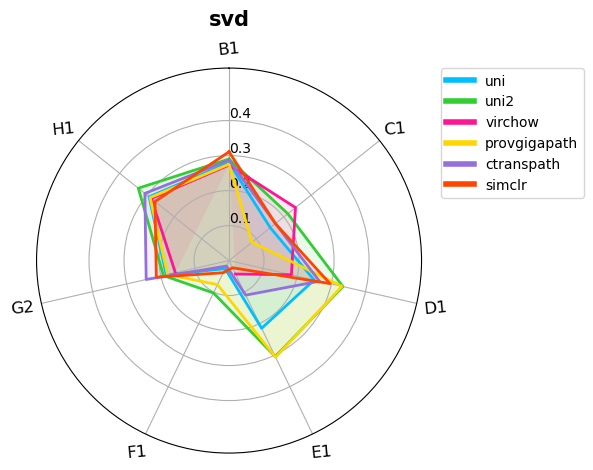

In [79]:
for model in base_model_list:
    d_test = df_comp_patient[(df_comp_patient["model"] == model) & (df_comp_patient["clustering"] == "svd")].T
    d_test.columns = d_test.loc['patient'].values
    make_spider(d_test, row=1, color=base_model_palette[model], title=model)
    plt.title("svd", weight='bold', y=1.09, fontsize=15)
    
handles = [plt.Line2D([0], [0], color=base_model_palette[model], lw=4) for model in base_model_list]
plt.legend(handles, base_model_list, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.savefig(os.path.join(config['figures_folder'], "Figure2/unsupervised_clustering_radarplot_svd.pdf"), bbox_inches='tight')

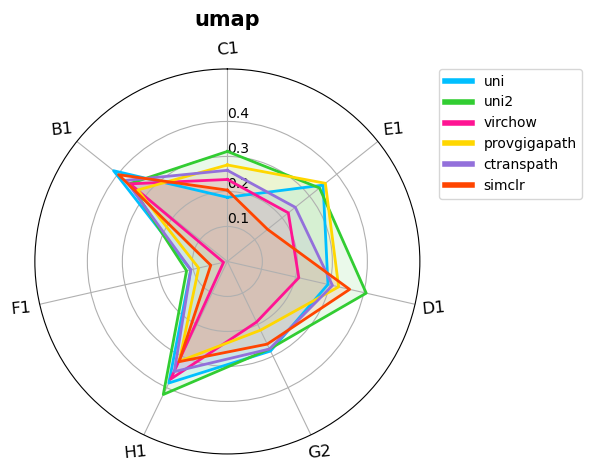

In [80]:
for model in base_model_list:
    d_test = df_comp_patient[(df_comp_patient["model"] == model) & (df_comp_patient["clustering"] == "umap")].T
    d_test.columns = d_test.loc['patient'].values
    make_spider(d_test, row=1, color=base_model_palette[model], title=model)
    plt.title("umap", weight='bold', y=1.09, fontsize=15)
handles = [plt.Line2D([0], [0], color=base_model_palette[model], lw=4) for model in base_model_list]
plt.legend(handles, base_model_list, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)   
plt.savefig(os.path.join(config['figures_folder'], "Figure2/unsupervised_clustering_radarplot_umap.pdf"), bbox_inches='tight')

In [81]:
ari_raw = pd.DataFrame.from_dict({model: {patient: raw_clust[model][patient]['ari'] for patient in raw_clust[model].keys() if patient not in ["ARI_tumor"]} for model in raw_clust.keys()})
df_raw_overall = pd.DataFrame(ari_raw.loc["all"])
df_raw_overall.columns = ['ari']

In [82]:
ari_svd = pd.DataFrame.from_dict({model: {patient: svd_clust[model][patient]['ari'] for patient in svd_clust[model].keys()  if patient != 'ARI_tumor'} for model in svd_clust.keys()})
df_svd_overall = pd.DataFrame(ari_svd.loc["all"])
df_svd_overall.columns = ['ari']

In [83]:
benchmark_clustering.image_embeddings

{}

In [84]:
ari_umap_overall = benchmark_clustering.get_best_UMAP_ari_overall()   

Computing best UMAP parameters for model uni...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni2...
Loading best UMAP parameters for model uni2...
Computing best UMAP parameters for model virchow...
Loading best UMAP parameters for model virchow...
Computing best UMAP parameters for model provgigapath...
Loading best UMAP parameters for model provgigapath...
Computing best UMAP parameters for model ctranspath...
Loading best UMAP parameters for model ctranspath...
Computing best UMAP parameters for model simclr...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni2...
Loading best UMAP parameters for model uni2...
Computing best UMAP parameters for model virchow...
Loading best UMAP parameters for model virchow...
Computing best UMAP parameters for model provgigapath...
Loading best UMAP parameters for model provgigapath...
Computing best UMAP parameters for model ctranspath...
Loading best UMAP paramete

In [85]:


try:
    with open(os.path.join(config['base_benchmark_folder'], 'unsupervised_clustering_ARI', 'kmeans', f'best_umap_ari_overall.json')) as f:
        ari_umap_overall = json.load(f)
except:
    ari_umap_overall = benchmark_clustering.get_best_UMAP_ari_overall()
ari_umap_overall = benchmark_clustering.get_best_UMAP_ari_overall()   
df_umap_overall = pd.DataFrame(ari_umap_overall).T[['ari']]


Computing best UMAP parameters for model uni...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni2...
Loading best UMAP parameters for model uni2...
Computing best UMAP parameters for model virchow...
Loading best UMAP parameters for model virchow...
Computing best UMAP parameters for model provgigapath...
Loading best UMAP parameters for model provgigapath...
Computing best UMAP parameters for model ctranspath...
Loading best UMAP parameters for model ctranspath...
Computing best UMAP parameters for model simclr...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni2...
Loading best UMAP parameters for model uni2...
Computing best UMAP parameters for model virchow...
Loading best UMAP parameters for model virchow...
Computing best UMAP parameters for model provgigapath...
Loading best UMAP parameters for model provgigapath...
Computing best UMAP parameters for model ctranspath...
Loading best UMAP paramete

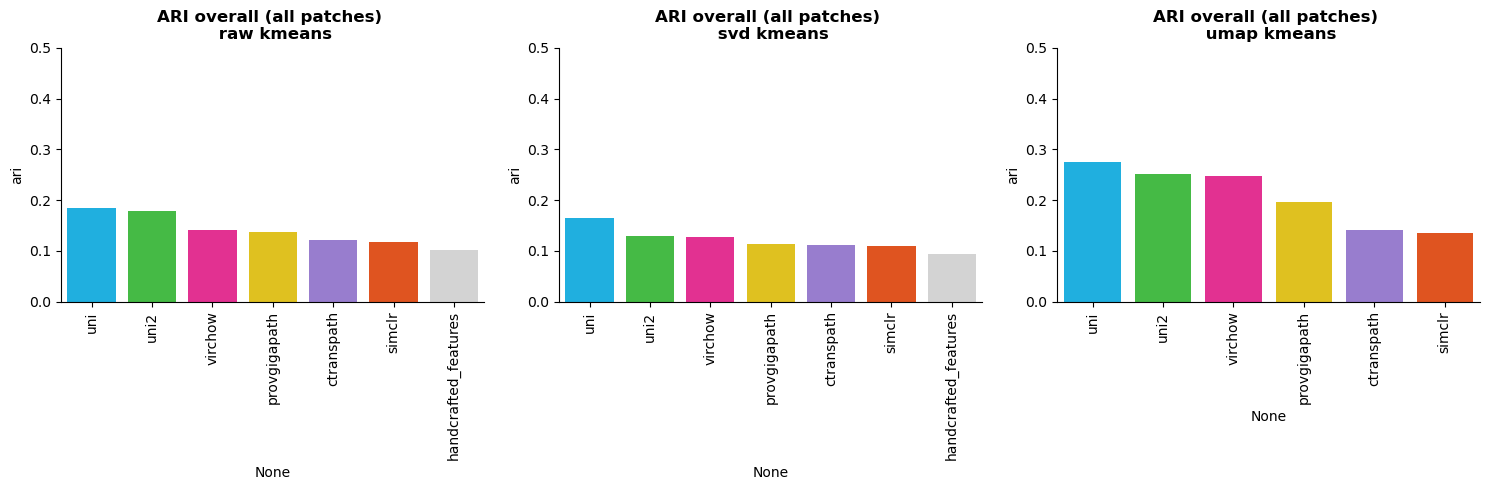

In [86]:
plt.figure(figsize=(15, 5))

names = ["raw kmeans", "svd kmeans", "umap kmeans"]

for i, df_ari_overall in enumerate([df_raw_overall, df_svd_overall, df_umap_overall]):
    plt.subplot(1, 3, 1 + i)
    sns.barplot(data=df_ari_overall.sort_values("ari", ascending=False), x=df_ari_overall.index, y="ari", hue=df_ari_overall.index, palette=base_model_palette)
    plt.xticks(rotation=90)
    sns.despine()
    plt.tight_layout()
    plt.ylim(0, 0.5)
    plt.title(f"ARI overall (all patches) \n {names[i]}", weight='bold')


plt.savefig(os.path.join(config['figures_folder'], "Figure2/unsupervised_clustering_raw_svd_umap_barplot.pdf"), bbox_inches='tight')



## Correlation ARI and shannon entropy

In [87]:
df_shannon.rename(index={'handcrafted': 'handcrafted_features'}, inplace=True)

In [88]:
df_comp

,model,ari,patient,clustering
0,uni,0.303135,B1,raw
1,uni,0.161330,C1,raw
2,uni,0.309677,D1,raw
3,uni,0.204250,E1,raw
4,uni,0.064554,F1,raw
...,...,...,...,...
44,handcrafted_features,0.255941,D1,umap
45,handcrafted_features,0.090632,G2,umap
46,handcrafted_features,0.242861,H1,umap
47,handcrafted_features,0.033992,F1,umap


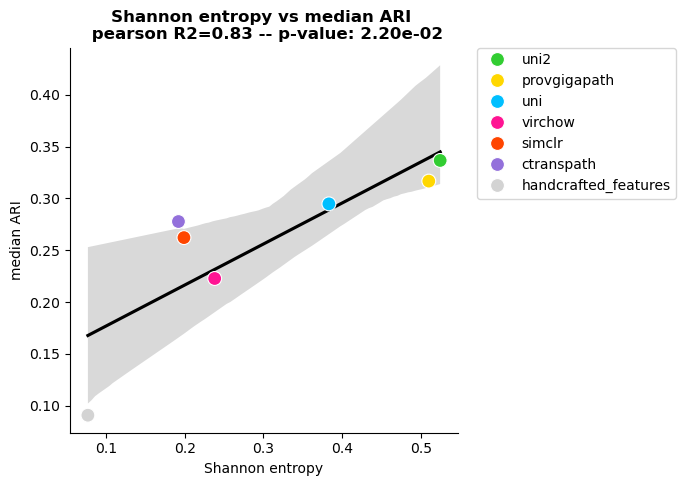

In [89]:
# df_model_summary = df_model_summary.drop(["uni_full_4096_prototypes"])
median_ari_per_model = df_comp[df_comp['clustering'] == 'umap'][['model', 'ari']].groupby('model').median()
median_ari_per_model.columns = ['median_ari']
df_model_summary = df_shannon.merge(median_ari_per_model, left_index=True, right_index=True)

s, p = pearsonr(df_model_summary['shannon_entropy'], df_model_summary['median_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='median_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='median_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100, zorder=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('median ARI')
plt.title(f'Shannon entropy vs median ARI \n pearson R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_median_ari.pdf"), bbox_inches='tight')

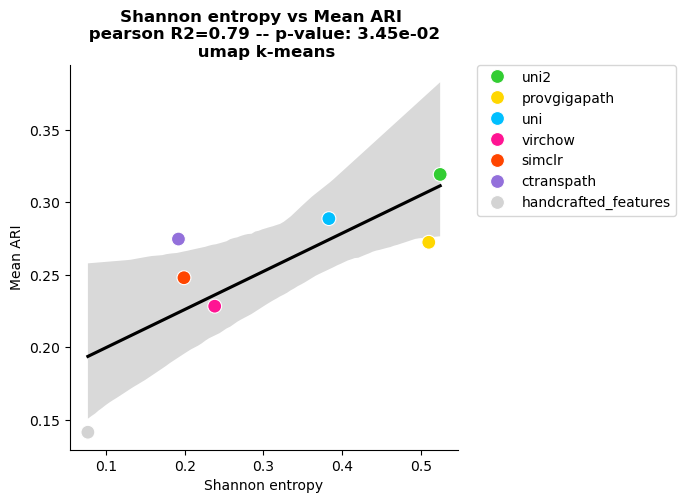

In [90]:
# df_model_summary = df_model_summary.drop(["uni_full_4096_prototypes"])
mean_ari_per_model = df_comp[df_comp['clustering'] == 'umap'][['model', 'ari']].groupby('model').mean()
mean_ari_per_model.columns = ['mean_ari']
df_model_summary = df_shannon.merge(mean_ari_per_model, left_index=True, right_index=True)

s, p = pearsonr(df_model_summary['shannon_entropy'], df_model_summary['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Mean ARI')
plt.title(f'Shannon entropy vs Mean ARI \n pearson R2={s:.2f} -- p-value: {p:.2e} \n umap k-means', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_mean_ari_umapkmeans.pdf"), bbox_inches='tight')

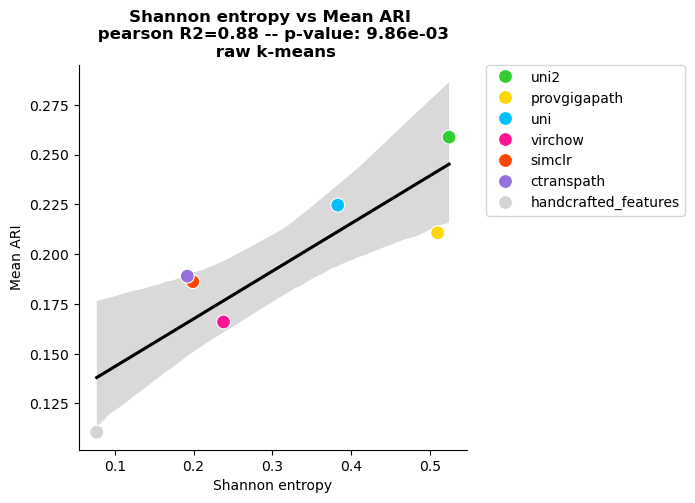

In [91]:
# df_model_summary = df_model_summary.drop(["uni_full_4096_prototypes"])
mean_ari_per_model = df_comp[df_comp['clustering'] == 'raw'][['model', 'ari']].groupby('model').mean()
mean_ari_per_model.columns = ['mean_ari']
df_model_summary = df_shannon.merge(mean_ari_per_model, left_index=True, right_index=True)

s, p = pearsonr(df_model_summary['shannon_entropy'], df_model_summary['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Mean ARI')
plt.title(f'Shannon entropy vs Mean ARI \n pearson R2={s:.2f} -- p-value: {p:.2e} \n raw k-means', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_mean_ari_rawkmeans.pdf"), bbox_inches='tight')

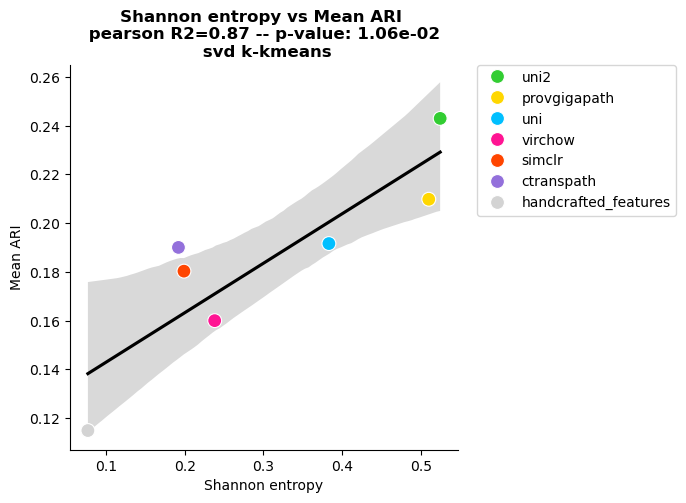

In [92]:
# df_model_summary = df_model_summary.drop(["uni_full_4096_prototypes"])
mean_ari_per_model = df_comp[df_comp['clustering'] == 'svd'][['model', 'ari']].groupby('model').mean()
mean_ari_per_model.columns = ['mean_ari']
df_model_summary = df_shannon.merge(mean_ari_per_model, left_index=True, right_index=True)

s, p = pearsonr(df_model_summary['shannon_entropy'], df_model_summary['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Mean ARI')
plt.title(f'Shannon entropy vs Mean ARI \n pearson R2={s:.2f} -- p-value: {p:.2e} \n svd k-kmeans', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_mean_ari_svdkmeans.pdf"), bbox_inches='tight')

In [100]:
# try:
#     with open(os.path.join(config['base_benchmark_folder'], 'unsupervised_clustering_ARI', 'kmeans', f"best_umap_ari_overall_annotated_only.json")) as f:
#         overall_umap = json.load(f)
# except:
overall_umap = benchmark_clustering.get_best_UMAP_ari_overall(annotated_only=True)
    
overall_umap_aris = {}
for model in overall_umap.keys():
    overall_umap_aris[model] = overall_umap[model]['ari']

overall_umap_aris["handcrafted_features"] = json.load(open(os.path.join(benchmark_clustering.saving_folder, f'best_umap_ari_model_handcrafted_features_all_annotated_only.json')))['ari']

df_model_summary['overall_ari'] = pd.Series(overall_umap_aris)

Computing best UMAP parameters for model uni...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni2...
Loading best UMAP parameters for model uni2...
Computing best UMAP parameters for model virchow...
Loading best UMAP parameters for model virchow...
Computing best UMAP parameters for model provgigapath...
Loading best UMAP parameters for model provgigapath...
Computing best UMAP parameters for model ctranspath...
Loading best UMAP parameters for model ctranspath...
Computing best UMAP parameters for model simclr...
Loading best UMAP parameters for model simclr...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni2...
Loading best UMAP parameters for model uni2...
Computing best UMAP parameters for model virchow...
Loading best UMAP parameters for model virchow...
Computing best UMAP parameters for model provgigapath...
Loading best UMAP parameters for model provgigapath...
Computing best UMAP parameters f

In [101]:
df_model_summary

,shannon_entropy,mean_ari,overall_ari
uni2,0.524574,0.242994,0.240536
provgigapath,0.510116,0.209816,0.227397
uni,0.383174,0.191646,0.191150
virchow,0.238045,0.160020,0.183175
simclr,0.198963,0.180331,0.153803
ctranspath,0.191989,0.190064,0.178182
handcrafted_features,0.076902,0.114933,0.123557


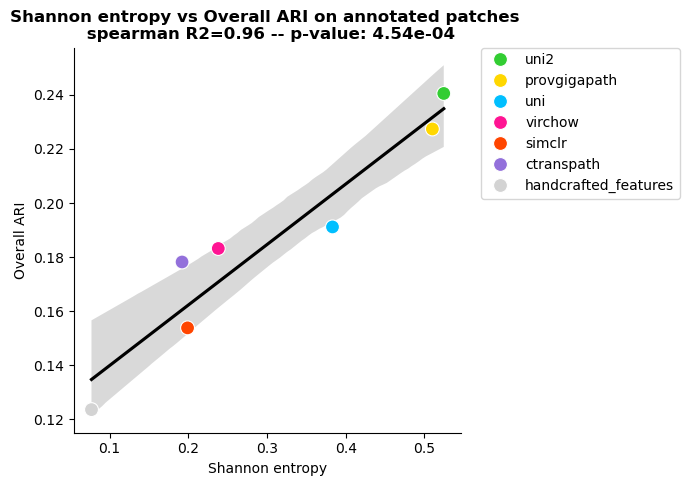

In [102]:
s, p = spearmanr(df_model_summary['shannon_entropy'], df_model_summary['overall_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Overall ARI')
plt.title(f'Shannon entropy vs Overall ARI on annotated patches \n spearman R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_overall_ari_annotated_only.pdf"), bbox_inches='tight')

Computing best UMAP parameters for model uni...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni2...
Loading best UMAP parameters for model uni2...
Computing best UMAP parameters for model virchow...
Loading best UMAP parameters for model virchow...
Computing best UMAP parameters for model provgigapath...
Loading best UMAP parameters for model provgigapath...
Computing best UMAP parameters for model ctranspath...
Loading best UMAP parameters for model ctranspath...
Computing best UMAP parameters for model simclr...
Loading best UMAP parameters for model simclr...


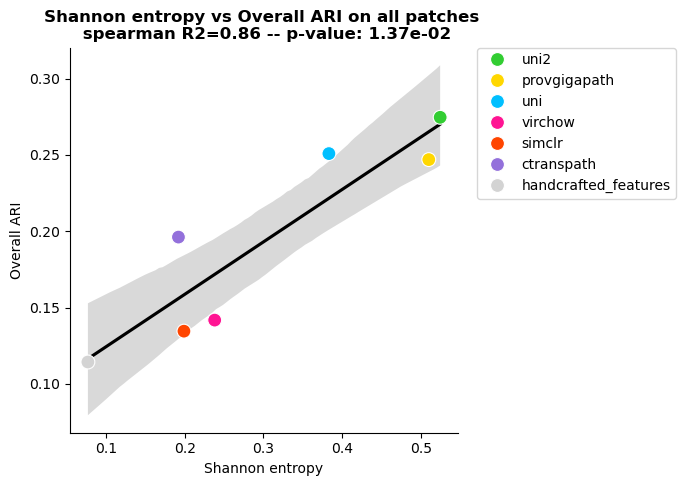

In [104]:
# try:
#     with open(os.path.join(config['base_benchmark_folder'], 'unsupervised_clustering_ARI', 'kmeans', f'best_umap_ari_overall.json')) as f:
#         overall_umap = json.load(f)
# except:
overall_umap = benchmark_clustering.get_best_UMAP_ari_overall()
    
overall_umap_aris = {}
for model in overall_umap.keys():
    overall_umap_aris[model] = overall_umap[model]['ari']
overall_umap_aris["handcrafted_features"] = json.load(open(os.path.join(benchmark_clustering.saving_folder, f'best_umap_ari_model_handcrafted_features_all.json')))['ari']

df_model_summary['overall_ari'] = pd.Series(overall_umap_aris)

s, p = spearmanr(df_model_summary['shannon_entropy'], df_model_summary['overall_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', hue=df_model_summary.index,
                palette=base_model_palette, s=100, zorder=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Overall ARI')
plt.title(f'Shannon entropy vs Overall ARI on all patches \n spearman R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_entropy_vs_overall_ari.pdf"), bbox_inches='tight')

In [105]:
df_model_summary2 = df_comp.merge(df_shannon, left_on='model', right_index=True, how='left')
df_model_summary2

,model,ari,patient,clustering,shannon_entropy
0,uni,0.303135,B1,raw,0.383174
1,uni,0.161330,C1,raw,0.383174
2,uni,0.309677,D1,raw,0.383174
3,uni,0.204250,E1,raw,0.383174
4,uni,0.064554,F1,raw,0.383174
...,...,...,...,...,...
44,handcrafted_features,0.255941,D1,umap,0.076902
45,handcrafted_features,0.090632,G2,umap,0.076902
46,handcrafted_features,0.242861,H1,umap,0.076902
47,handcrafted_features,0.033992,F1,umap,0.076902


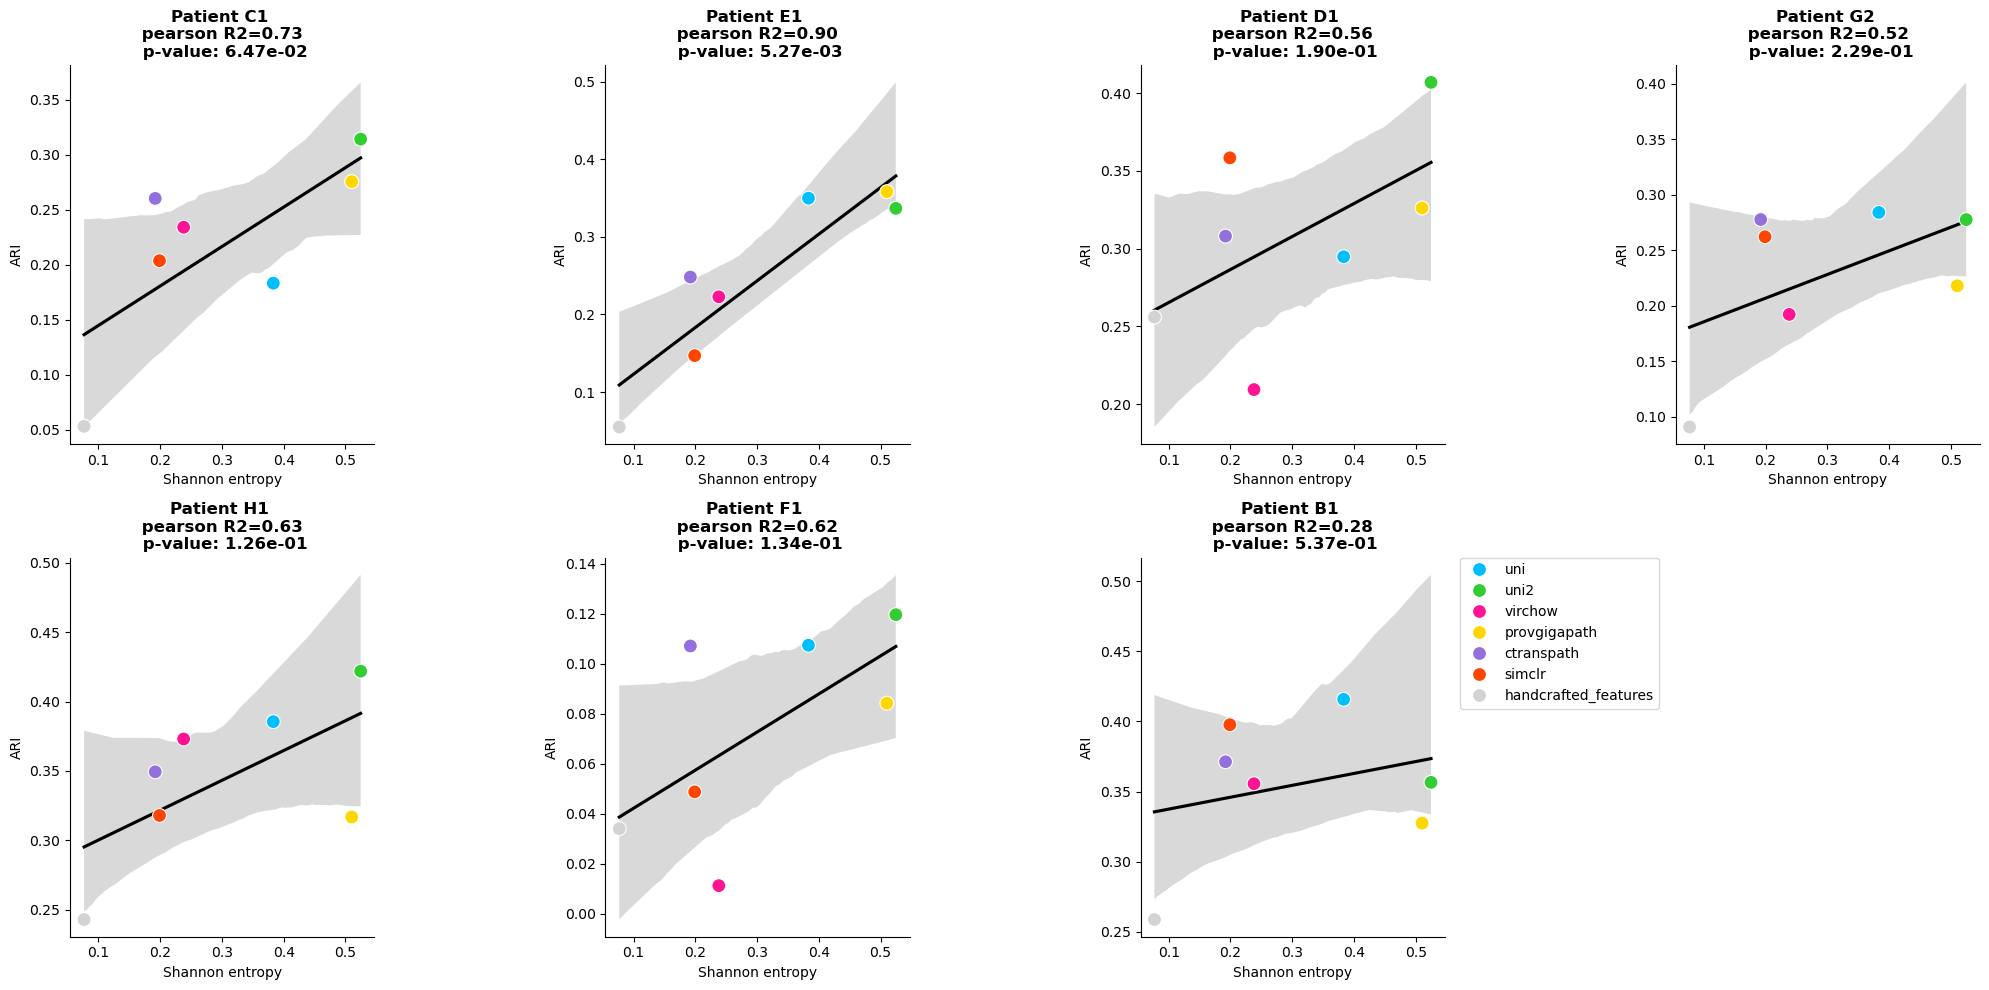

In [106]:
## Shannon vs ARI per patient


df_model_summary2 = df_comp[df_comp["clustering"] == 'umap'].merge(df_shannon, left_on='model', right_index=True, how='left')
n_patients = len(df_model_summary2['patient'].unique())
plt.figure(figsize=(20, 10))
for i, patient in enumerate(df_model_summary2['patient'].unique()):
    sub_df = df_model_summary2[df_model_summary2['patient'] == patient]

    s, p = pearsonr(sub_df['shannon_entropy'], sub_df['ari'])
    plt.subplot(2, int(np.ceil(n_patients/2)), i+1)
    sns.regplot(data=sub_df, x='shannon_entropy', y='ari', color='black')
    sns.scatterplot(data=sub_df, x='shannon_entropy', y='ari', hue=sub_df['model'],
                    palette=base_model_palette, s=100, zorder=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Shannon entropy')
    plt.ylabel('ARI')
    plt.title(f'Patient {patient} \n pearson R2={s:.2f} \n p-value: {p:.2e}', weight='bold')
    sns.despine()

    if i != 6:
        plt.legend().remove()
    else:
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

plt.savefig(os.path.join(config['figures_folder'], "Figure2/overall_shannon_vs_ari_per_patient.pdf"), bbox_inches='tight')
    


In [107]:
with open(os.path.join(config['base_benchmark_folder'], "shannon_entropy", "shannon_entropy_per_tumor_all_comps_raw.json")) as f:
    shannon_per_patient = json.load(f)
df_shannon_per_patient = pd.DataFrame.from_dict(shannon_per_patient, orient='index')
df_shannon_per_patient

df_model_summary2 = df_comp[df_comp["clustering"] == 'umap'].merge(df_shannon_per_patient, left_on='patient', right_index=True, how='left')

df_shannon_per_patient_melted = pd.melt(df_shannon_per_patient, var_name='patient', value_name='shannon_entropy_per_patient')
df_shannon_per_patient_melted['model'] = list(df_shannon_per_patient.index) * len(df_shannon_per_patient.columns)

if config['dataset'] == 'HER2':
    df_comp['patient'] = df_comp['patient'].apply(lambda x: x[0])
else:
    df_comp['patient'] = df_comp['patient'].apply(lambda x: x.split('_')[0])

df_model_summary2 = df_comp[df_comp["clustering"] == 'umap'].merge(df_shannon_per_patient_melted, on=['patient', 'model'])



    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


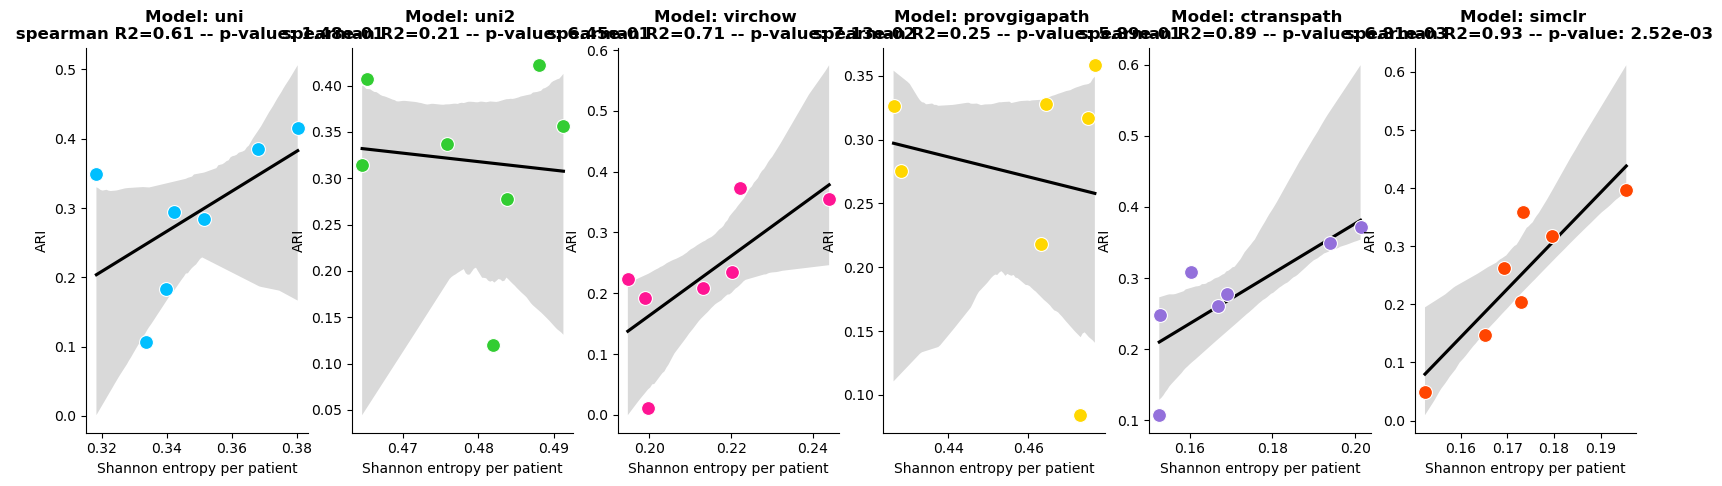

In [108]:
plt.figure(figsize=(20, 5))
for i, model in enumerate(df_model_summary2['model'].unique()):
    plt.subplot(1, len(df_model_summary2['model'].unique()), i+1)
    sub_df = df_model_summary2[df_model_summary2['model'] == model]
    s, p = spearmanr(sub_df['shannon_entropy_per_patient'], sub_df['ari'])
    sns.regplot(data=sub_df, x='shannon_entropy_per_patient', y='ari', color='black')
    sns.scatterplot(data=sub_df, x='shannon_entropy_per_patient', y='ari', color=config['base_model_palette'][model], s=100, zorder=2)
    plt.legend().remove()
    plt.xlabel('Shannon entropy per patient')
    plt.ylabel('ARI')
    plt.title(f'Model: {model} \n spearman R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
    sns.despine()
    plt.savefig(os.path.join(config['figures_folder'], f"Figure2/shannon_entropy_vs_ari_per_patient_{model}.pdf"), bbox_inches='tight')

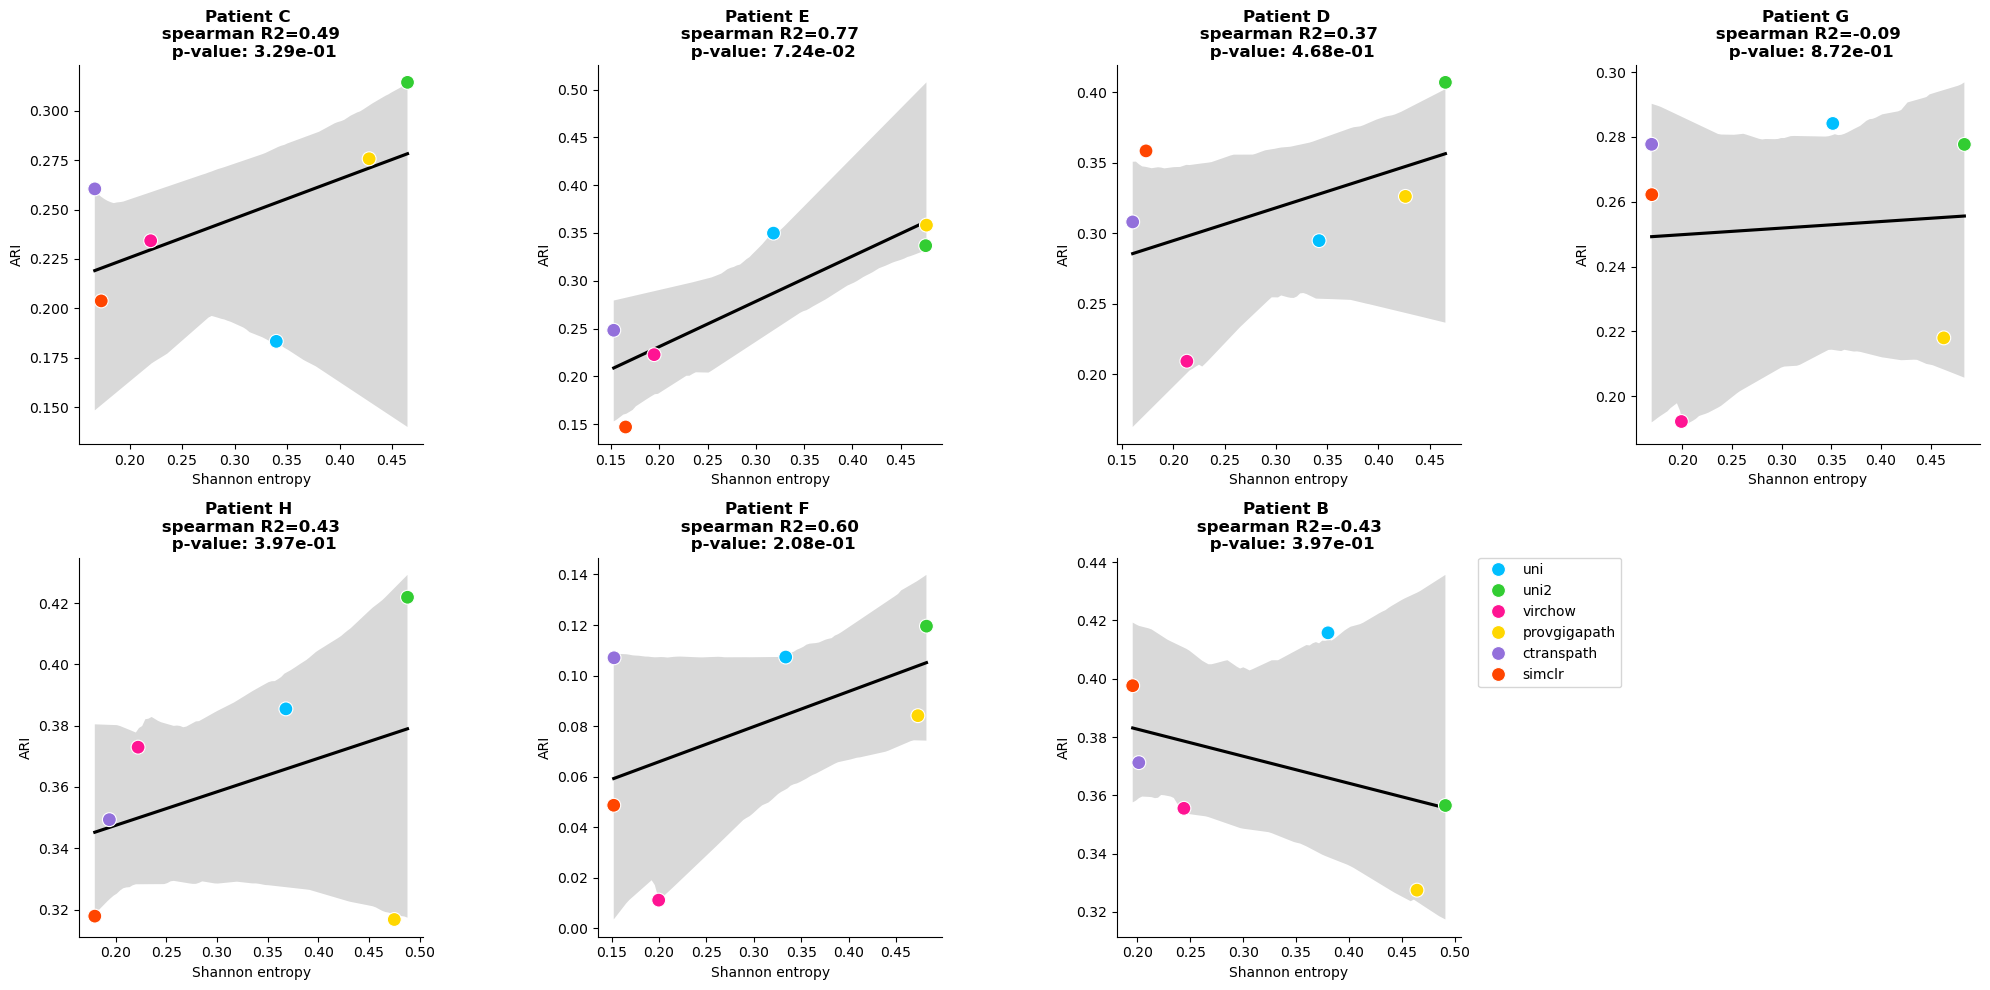

In [109]:
plt.figure(figsize=(20, 10))
for i, patient in enumerate(df_model_summary2['patient'].unique()):
    sub_df = df_model_summary2[df_model_summary2['patient'] == patient]

    s, p = spearmanr(sub_df['shannon_entropy_per_patient'], sub_df['ari'])
    plt.subplot(2, 4, i+1)
    sns.regplot(data=sub_df, x='shannon_entropy_per_patient', y='ari', color='black')
    sns.scatterplot(data=sub_df, x='shannon_entropy_per_patient', y='ari', hue=sub_df['model'],
                    palette=base_model_palette, s=100, zorder=2)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.xlabel('Shannon entropy')
    plt.ylabel('ARI')
    plt.title(f'Patient {patient} \n spearman R2={s:.2f} \n p-value: {p:.2e}', weight='bold')
    sns.despine()

    if i != 6:
        plt.legend().remove()
    else:
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()

plt.savefig(os.path.join(config['figures_folder'], "Figure2/shannon_per_patient_vs_ari_per_patient.pdf"), bbox_inches='tight')


/tmp/ipykernel_1328749/871207982.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_vs_mean = df_model_summary2.groupby('model').mean()


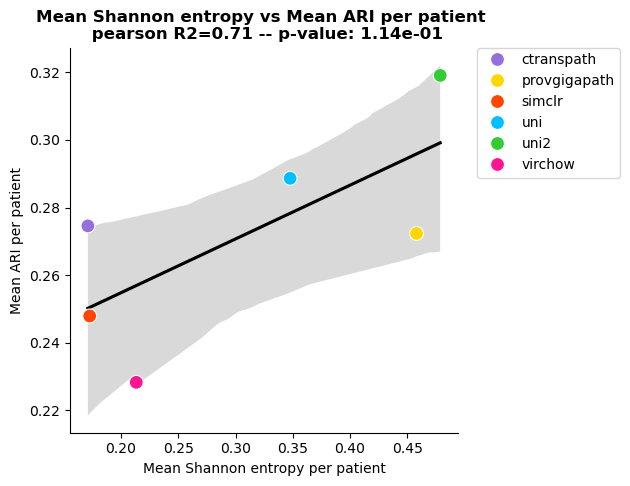

In [123]:
mean_vs_mean = df_model_summary2.groupby('model').mean()

s, p = pearsonr(mean_vs_mean['shannon_entropy_per_patient'], mean_vs_mean['ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=mean_vs_mean, x='shannon_entropy_per_patient', y='ari', color='black')
sns.scatterplot(data=mean_vs_mean, x='shannon_entropy_per_patient', y='ari', hue=mean_vs_mean.index,
                palette=base_model_palette, s=100, zorder=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Mean Shannon entropy per patient')
plt.ylabel('Mean ARI per patient')
plt.title(f'Mean Shannon entropy vs Mean ARI per patient \n pearson R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()

Model: uni, Type: C1, Dist: 0.001
Model: uni2, Type: C1, Dist: 0.001
Model: virchow, Type: C1, Dist: 0.001
Model: provgigapath, Type: C1, Dist: 0.001
Model: ctranspath, Type: C1, Dist: 0.001
Model: simclr, Type: C1, Dist: 0.001
Model: uni, Type: E1, Dist: 0.001
Model: uni2, Type: E1, Dist: 0.001
Model: virchow, Type: E1, Dist: 0.001
Model: provgigapath, Type: E1, Dist: 0.001
Model: ctranspath, Type: E1, Dist: 0.001
Model: simclr, Type: E1, Dist: 0.001
Model: uni, Type: D1, Dist: 0.001
Model: uni2, Type: D1, Dist: 0.001
Model: virchow, Type: D1, Dist: 0.001
Model: provgigapath, Type: D1, Dist: 0.001
Model: ctranspath, Type: D1, Dist: 0.001
Model: simclr, Type: D1, Dist: 0.001
Model: uni, Type: G2, Dist: 0.001
Model: uni2, Type: G2, Dist: 0.001
Model: virchow, Type: G2, Dist: 0.001
Model: provgigapath, Type: G2, Dist: 0.001
Model: ctranspath, Type: G2, Dist: 0.001
Model: simclr, Type: G2, Dist: 0.001
Model: uni, Type: H1, Dist: 0.001
Model: uni2, Type: H1, Dist: 0.001
Model: virchow, Typ

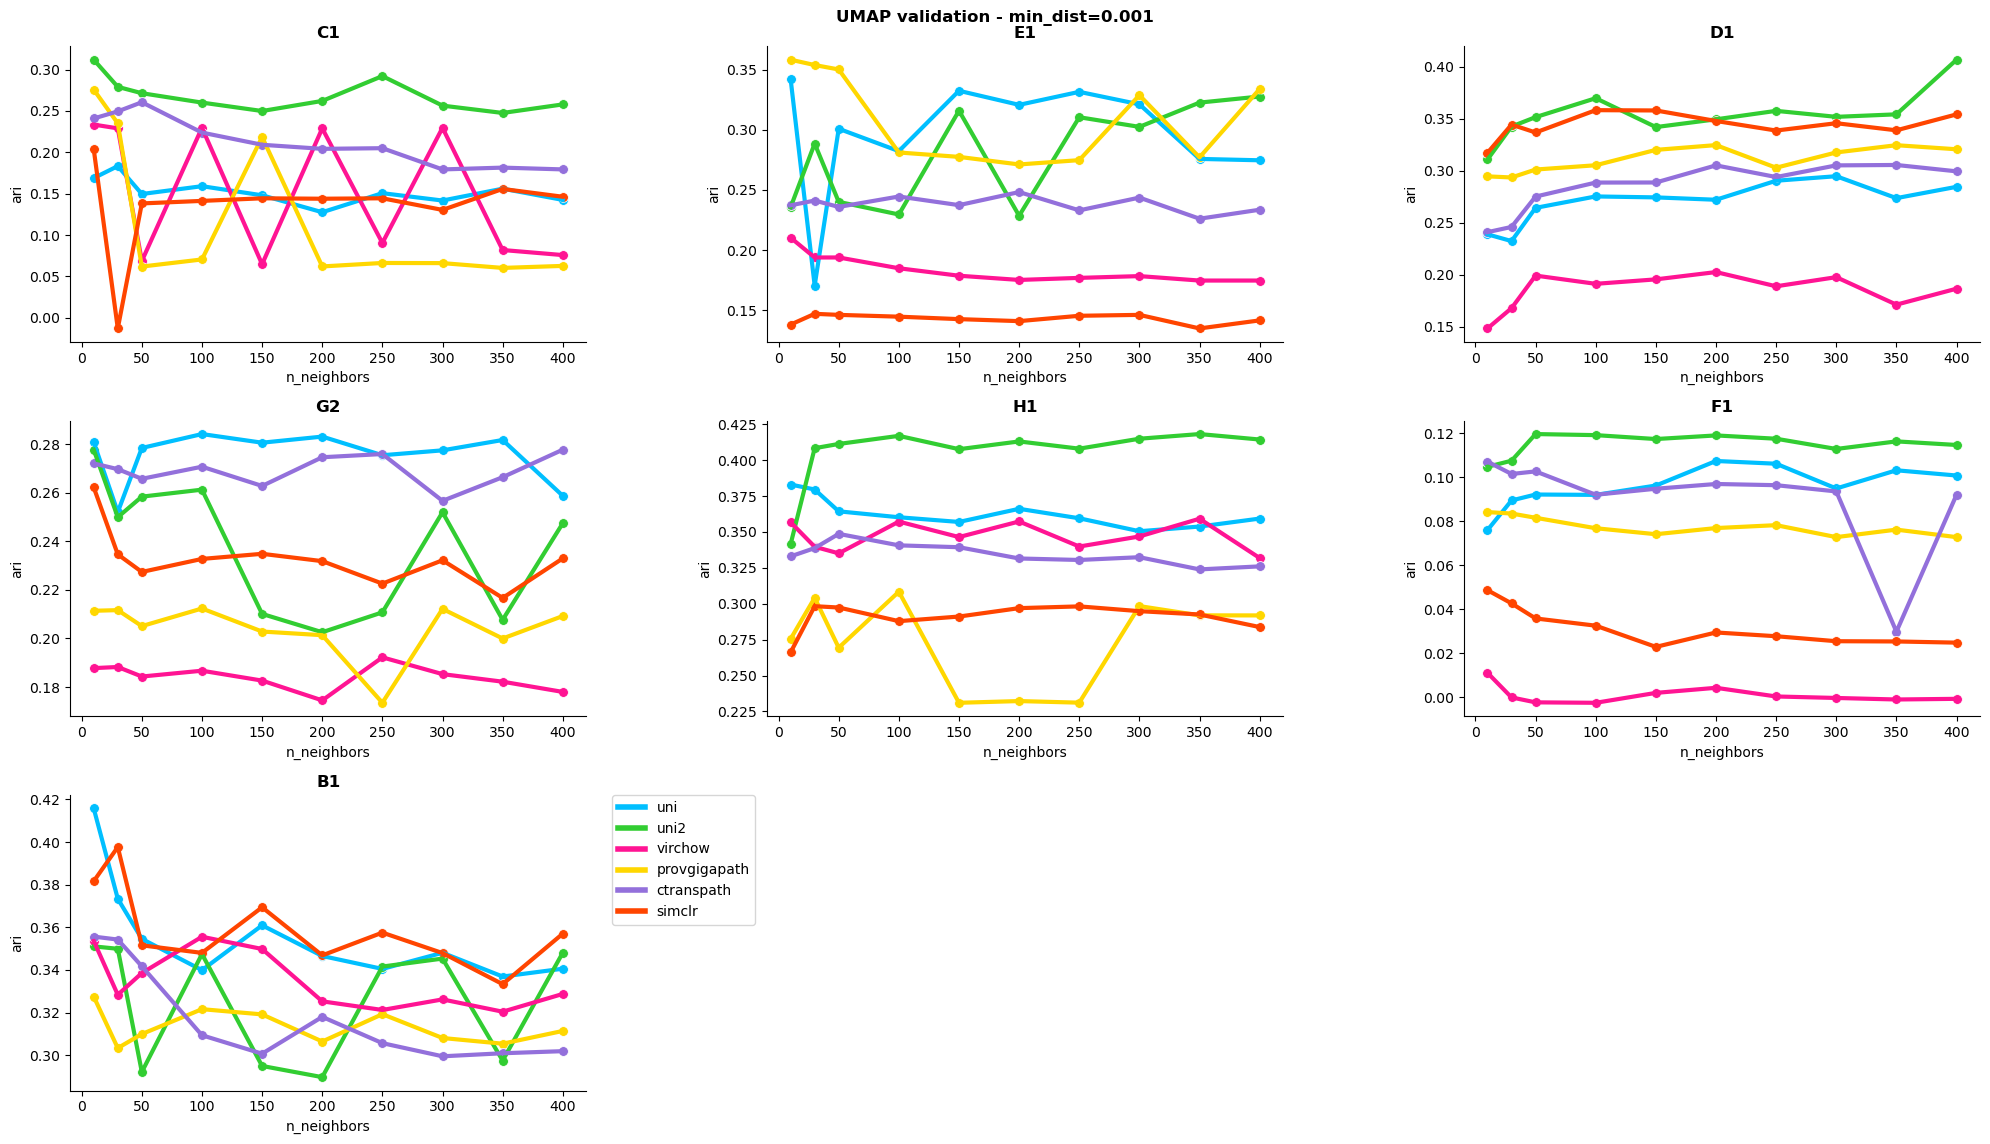

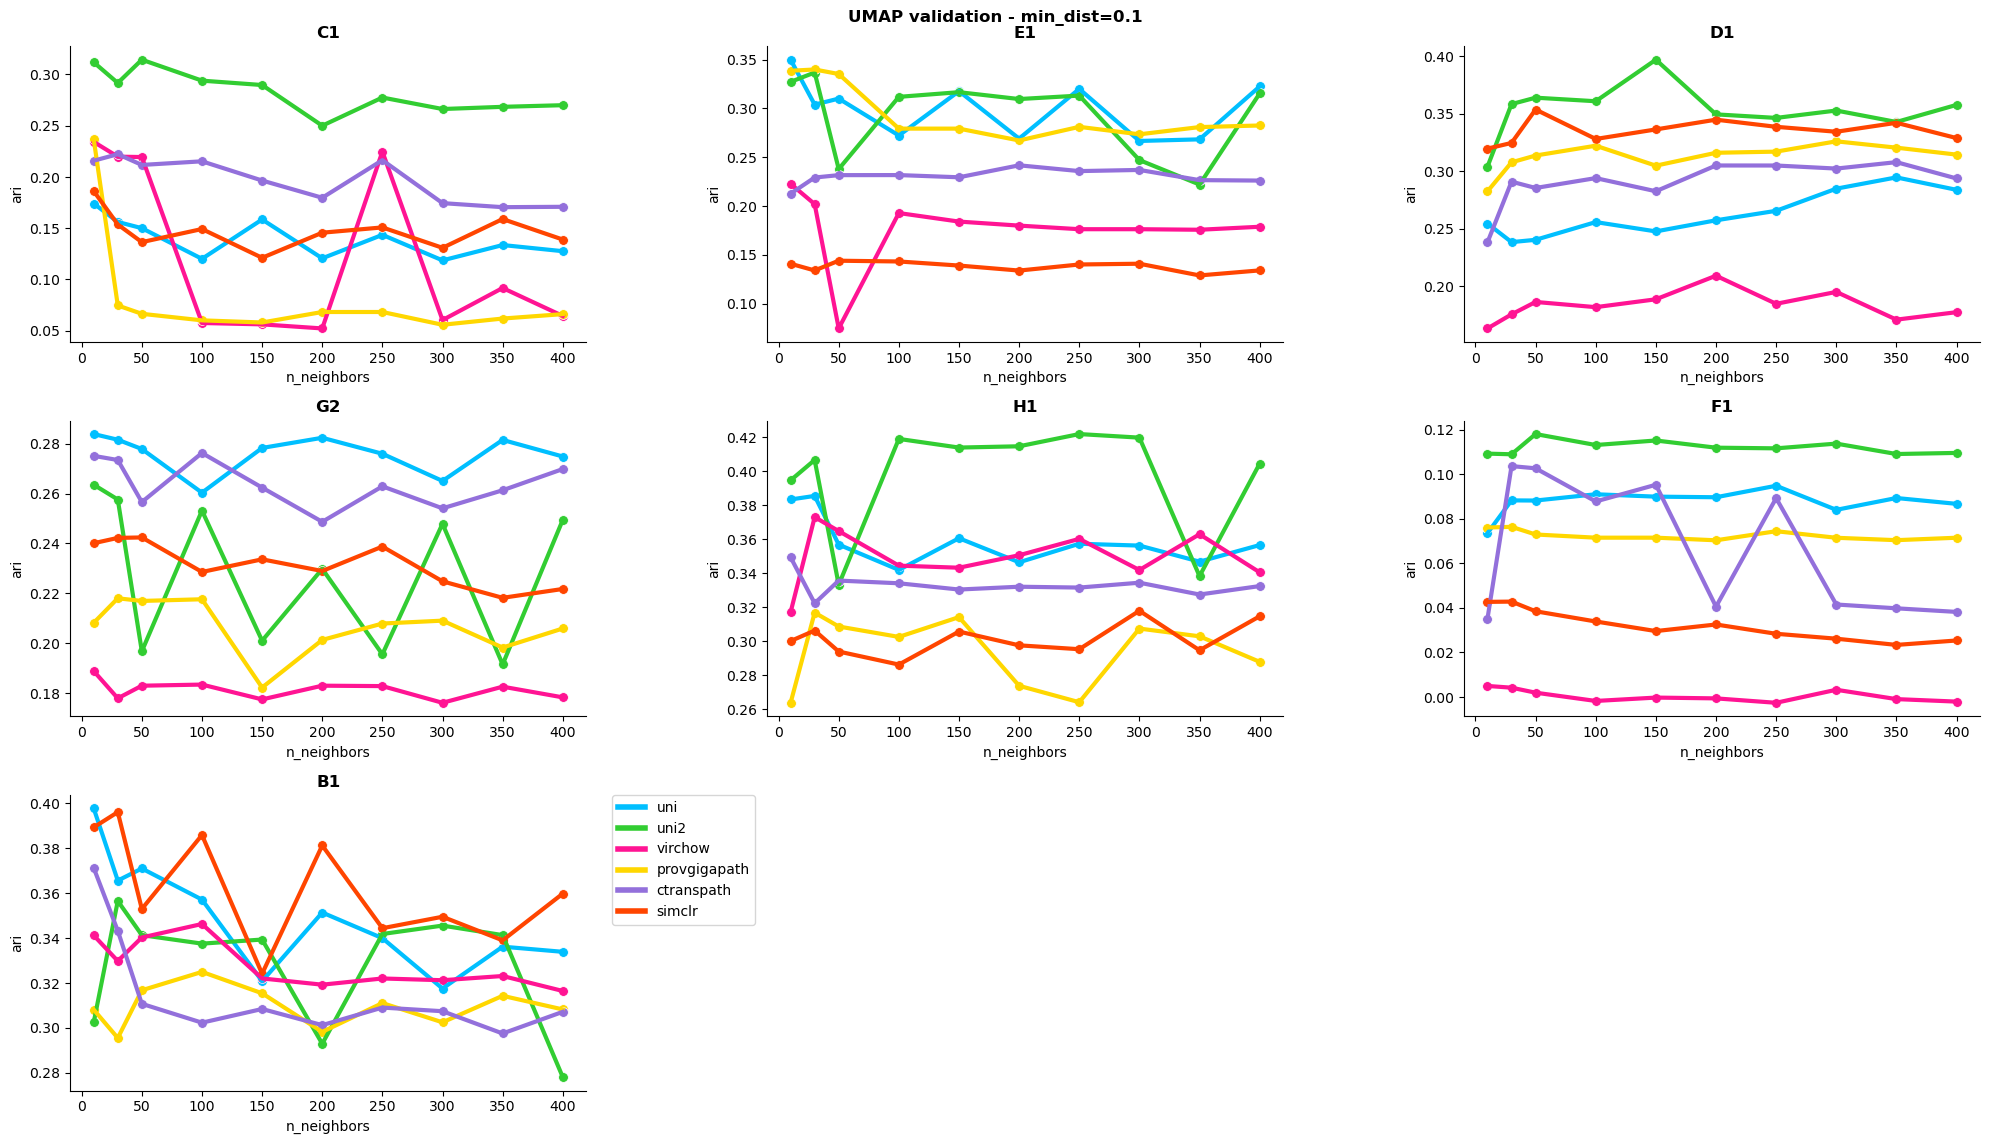

In [111]:
## UMAP validation parameters
import glob 

for dist in [0.001, 0.1]:
    plt.figure(figsize=(20, 15))
    for i, type in enumerate(umap_clust[base_model_list[0]].keys()):
        plt.subplot(4, 3, i+1)
        
        filenames = []
        for model in base_model_palette.keys():
            if (model != 'scMTOP') & (model != 'handcrafted') & (model != 'handcrafted_features'):
                print(f"Model: {model}, Type: {type}, Dist: {dist}")
                filename = glob.glob(os.path.join(config['base_benchmark_folder'], 'unsupervised_clustering_ARI', "kmeans", f"UMAP_validation_{model}_{type}*.csv"))[0]
                filenames.append(filename)

                df_ = pd.read_csv(filename, index_col=0)
                
                sns.scatterplot(x=df_[df_['min_dist'] == dist]['n_neighbors'], 
                                y=df_[df_['min_dist'] == dist]['ari'], 
                                label=f"{model} - {type}",  
                                s=50, 
                                color=base_model_palette[model], legend=False)
                
                sns.lineplot(x=df_[df_['min_dist'] == dist]['n_neighbors'], y=df_[df_['min_dist'] == dist]['ari'], 
                             label=f"{model} - {type}", 
                             color=base_model_palette[model],
                             linewidth=3, legend=False)

                plt.legend().remove()
            plt.title(type, weight='bold')
        
    handles = [plt.Line2D([0], [0], color=base_model_palette[model], lw=4) for model in base_model_list]
    plt.legend(handles, base_model_list, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)        
    sns.despine()
    plt.suptitle(f"UMAP validation - min_dist={dist}", weight='bold')
    plt.tight_layout()
        
    plt.savefig(os.path.join(config['figures_folder'], "Figure2/UMAP_parameters_validation_mindist_{dist}.pdf"), bbox_inches='tight')

## Correlation with the number of parameters

In [112]:

parameters = {'provgigapath': 1135, 'uni2': 681, 'virchow': 632, 'uni': 303, 'ctranspath': 28, 'simclr': 24}

embedding_size = {'provgigapath': 1536, 'uni2': 1536, 'virchow': 1280, 'uni': 1024, 'ctranspath': 768, 'simclr': 512}


In [113]:
df_shannon

df_parameters = pd.DataFrame.from_dict(parameters, orient='index', columns=['n_parameters'])
df_parameters = df_parameters.merge(df_shannon, left_index=True, right_index=True)

df_embedding_size = pd.DataFrame.from_dict(embedding_size, orient='index', columns=['embedding_size'])
df_embedding_size = df_embedding_size.merge(df_shannon, left_index=True, right_index=True)

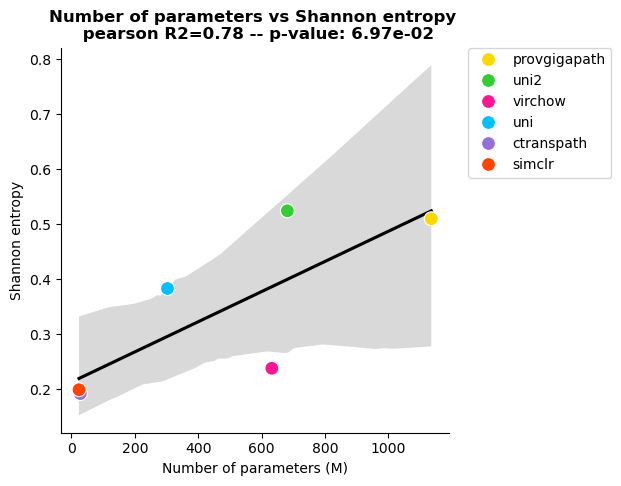

In [114]:
# compute pearson correlation

s, p = pearsonr(df_parameters['n_parameters'], df_parameters['shannon_entropy'])
plt.figure(figsize=(5, 5))
sns.regplot(df_parameters, x='n_parameters', y='shannon_entropy', color='black')
sns.scatterplot(df_parameters, x='n_parameters', y='shannon_entropy', hue=df_parameters.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of parameters (M)')
plt.ylabel('Shannon entropy')
plt.title(f"Number of parameters vs Shannon entropy \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/embedding_size_vs_shannon_entropy.pdf"), bbox_inches='tight')

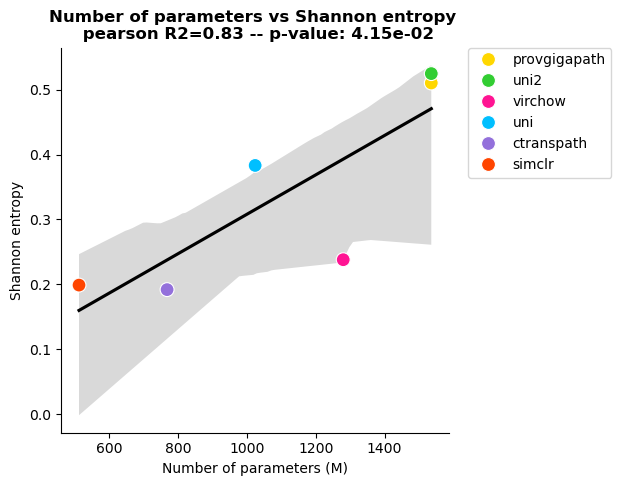

In [115]:
# compute pearson correlation

s, p = pearsonr(df_embedding_size['embedding_size'], df_embedding_size['shannon_entropy'])
plt.figure(figsize=(5, 5))
sns.regplot(df_embedding_size, x='embedding_size', y='shannon_entropy', color='black')
sns.scatterplot(df_embedding_size, x='embedding_size', y='shannon_entropy', hue=df_embedding_size.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of parameters (M)')
plt.ylabel('Shannon entropy')
plt.title(f"Number of parameters vs Shannon entropy \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/number_of_parameters_vs_shannon_entropy.pdf"), bbox_inches='tight')

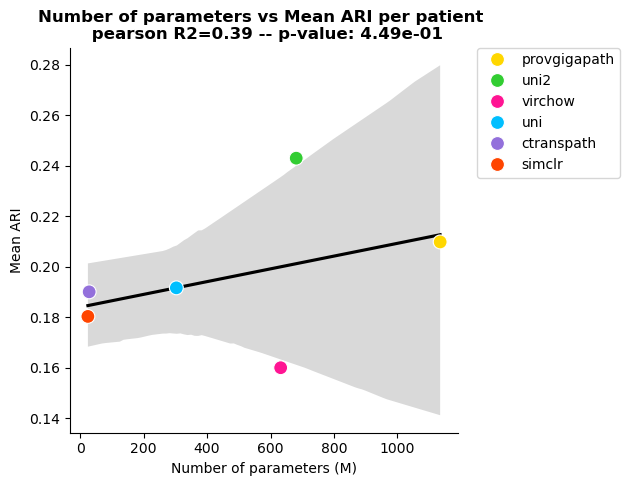

In [116]:
df_parameters = df_parameters.merge(df_model_summary[['mean_ari']], left_index=True, right_index=True)

s, p = pearsonr(df_parameters['n_parameters'], df_parameters['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(df_parameters, x='n_parameters', y='mean_ari', color='black')
sns.scatterplot(df_parameters, x='n_parameters', y='mean_ari', hue=df_parameters.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of parameters (M)')
plt.ylabel('Mean ARI')
plt.title(f"Number of parameters vs Mean ARI per patient \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/number_of_parameters_vs_mean_ari.pdf"), bbox_inches='tight')

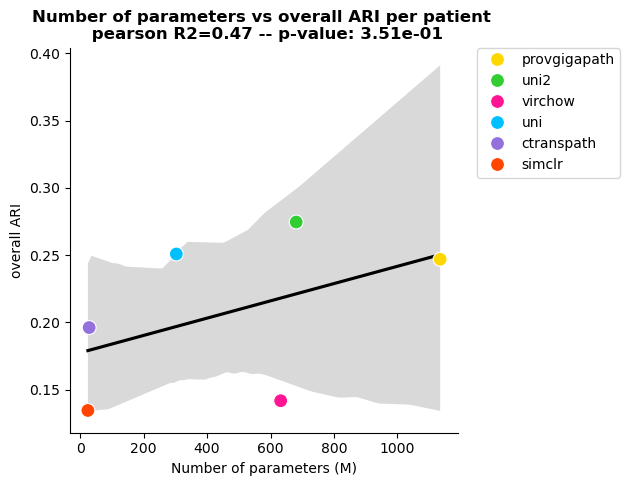

In [117]:
df_parameters = df_parameters.merge(df_model_summary[['overall_ari']], left_index=True, right_index=True)

s, p = pearsonr(df_parameters['n_parameters'], df_parameters['overall_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(df_parameters, x='n_parameters', y='overall_ari', color='black')
sns.scatterplot(df_parameters, x='n_parameters', y='overall_ari', hue=df_parameters.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Number of parameters (M)')
plt.ylabel('overall ARI')
plt.title(f"Number of parameters vs overall ARI per patient \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/number_of_parameters_vs_overall_ari.pdf"), bbox_inches='tight')

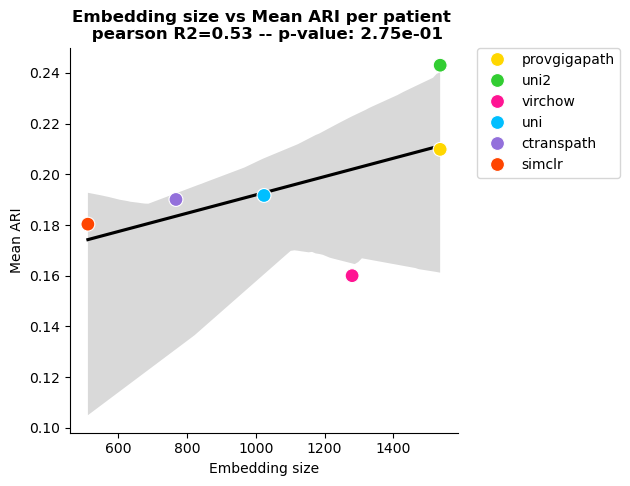

In [118]:
df_embedding_size = df_embedding_size.merge(df_model_summary[['mean_ari']], left_index=True, right_index=True)

s, p = pearsonr(df_embedding_size['embedding_size'], df_embedding_size['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(df_embedding_size, x='embedding_size', y='mean_ari', color='black')
sns.scatterplot(df_embedding_size, x='embedding_size', y='mean_ari', hue=df_embedding_size.index, palette=base_model_palette, s=100, zorder=2)
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Embedding size')
plt.ylabel('Mean ARI')
plt.title(f"Embedding size vs Mean ARI per patient \n pearson R2={s:.2f} -- p-value: {p:.2e}", weight='bold')
plt.savefig(os.path.join(config['figures_folder'], "Figure2/embedding_size_vs_mean_ari.pdf"), bbox_inches='tight')